### Machine Learning (Classification Problem): Waze User Churn Prediction Case Study


In [1]:
# Import basic libraries
import pandas as pd 
import numpy as np 

# Import visualization libraries
import seaborn as sns 
import matplotlib.pyplot as plt 

# Import ML libraries
from sklearn.preprocessing import MinMaxScaler, RobustScaler

# Other
from collections import Counter
import warnings
warnings.filterwarnings('ignore')

### Data Loading

In [2]:
df = pd.read_csv(r'../Waze/waze_dataset.csv')
df.head(3)

,ID,label,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,device
0,0,retained,283,226,296.748273,2276,208,0,2628.845068,1985.775061,28,19,Android
1,1,retained,133,107,326.896596,1225,19,64,13715.920550,3160.472914,13,11,iPhone
2,2,retained,114,95,135.522926,2651,0,0,3059.148818,1610.735904,14,8,Android


### Phase 1: Data Preprocessing
- Preparing and Processing Data for Modelling.
- Identify data issues, i.e. redundant data that will be dropped, missing data, etc.
- Encode categorical features in the data.
- Scale dataset.
- Plot a feature importances visualization, to understand features that may not be important predictor features from the dataset.

In [3]:
df.shape

(14999, 13)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       14999 non-null  int64  
 1   label                    14299 non-null  object 
 2   sessions                 14999 non-null  int64  
 3   drives                   14999 non-null  int64  
 4   total_sessions           14999 non-null  float64
 5   n_days_after_onboarding  14999 non-null  int64  
 6   total_navigations_fav1   14999 non-null  int64  
 7   total_navigations_fav2   14999 non-null  int64  
 8   driven_km_drives         14999 non-null  float64
 9   duration_minutes_drives  14999 non-null  float64
 10  activity_days            14999 non-null  int64  
 11  driving_days             14999 non-null  int64  
 12  device                   14999 non-null  object 
dtypes: float64(3), int64(8), object(2)
memory usage: 1.5+ MB


- Missing data in 'label'.

In [5]:
# Statistical description
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,14999.0,7499.000000,4329.982679,0.000000,3749.500000,7499.000000,11248.500000,14998.000000
sessions,14999.0,80.633776,80.699065,0.000000,23.000000,56.000000,112.000000,743.000000
drives,14999.0,67.281152,65.913872,0.000000,20.000000,48.000000,93.000000,596.000000
total_sessions,14999.0,189.964447,136.405128,0.220211,90.661156,159.568115,254.192341,1216.154633
n_days_after_onboarding,14999.0,1749.837789,1008.513876,4.000000,878.000000,1741.000000,2623.500000,3500.000000
total_navigations_fav1,14999.0,121.605974,148.121544,0.000000,9.000000,71.000000,178.000000,1236.000000
total_navigations_fav2,14999.0,29.672512,45.394651,0.000000,0.000000,9.000000,43.000000,415.000000
driven_km_drives,14999.0,4039.340921,2502.149334,60.441250,2212.600607,3493.858085,5289.861262,21183.401890
duration_minutes_drives,14999.0,1860.976012,1446.702288,18.282082,835.996260,1478.249859,2464.362632,15851.727160
activity_days,14999.0,15.537102,9.004655,0.000000,8.000000,16.000000,23.000000,31.000000


In [6]:
df.describe(exclude='int64, float64').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
ID,14999.0,NaN,NaN,NaN,7499.0,4329.982679,0.0,3749.5,7499.0,11248.5,14998.0
label,14299,2,retained,11763,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sessions,14999.0,NaN,NaN,NaN,80.633776,80.699065,0.0,23.0,56.0,112.0,743.0
drives,14999.0,NaN,NaN,NaN,67.281152,65.913872,0.0,20.0,48.0,93.0,596.0
total_sessions,14999.0,NaN,NaN,NaN,189.964447,136.405128,0.220211,90.661156,159.568115,254.192341,1216.154633
n_days_after_onboarding,14999.0,NaN,NaN,NaN,1749.837789,1008.513876,4.0,878.0,1741.0,2623.5,3500.0
total_navigations_fav1,14999.0,NaN,NaN,NaN,121.605974,148.121544,0.0,9.0,71.0,178.0,1236.0
total_navigations_fav2,14999.0,NaN,NaN,NaN,29.672512,45.394651,0.0,0.0,9.0,43.0,415.0
driven_km_drives,14999.0,NaN,NaN,NaN,4039.340921,2502.149334,60.44125,2212.600607,3493.858085,5289.861262,21183.40189
duration_minutes_drives,14999.0,NaN,NaN,NaN,1860.976012,1446.702288,18.282082,835.99626,1478.249859,2464.362632,15851.72716


In [7]:
df['label'].value_counts()

label
retained    11763
churned      2536
Name: count, dtype: int64

- Value counts for each label.

In [8]:
df.duplicated().sum()

0

- No duplicates.

In [9]:
df.isnull().sum()

ID                           0
label                      700
sessions                     0
drives                       0
total_sessions               0
n_days_after_onboarding      0
total_navigations_fav1       0
total_navigations_fav2       0
driven_km_drives             0
duration_minutes_drives      0
activity_days                0
driving_days                 0
device                       0
dtype: int64

- Missing data in label column.

### Exploratory Data Analysis

<Axes: ylabel='count'>

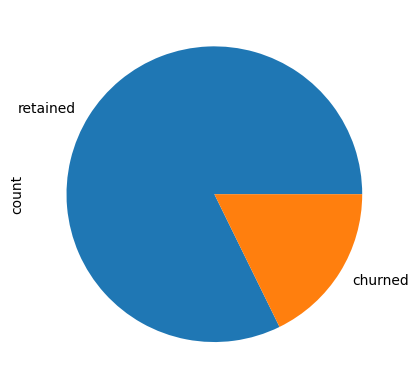

In [10]:
# Distribution of target feature
df['label'].value_counts().plot(kind='pie')

- High customer retained.

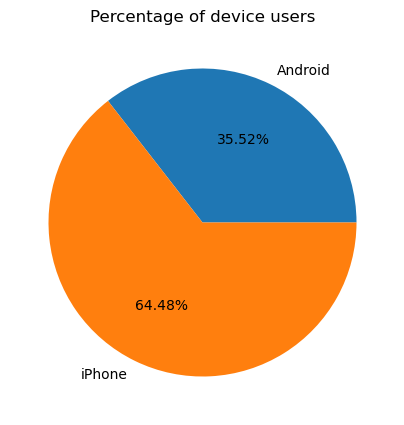

In [11]:
# Percentage of drive
fig, ax = plt.subplots(figsize=(5,5))
count = Counter(df['device'])
ax.pie(count.values(), labels=count.keys(), autopct=lambda p:f"{p:.2f}%")
ax.set_title("Percentage of device users")
plt.show();

- Most drivers used iPhone more than android.

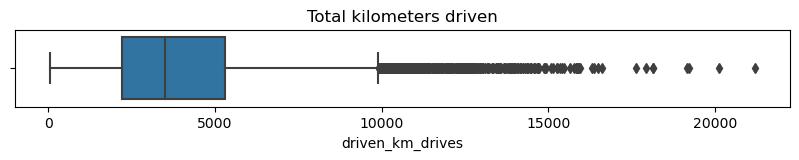

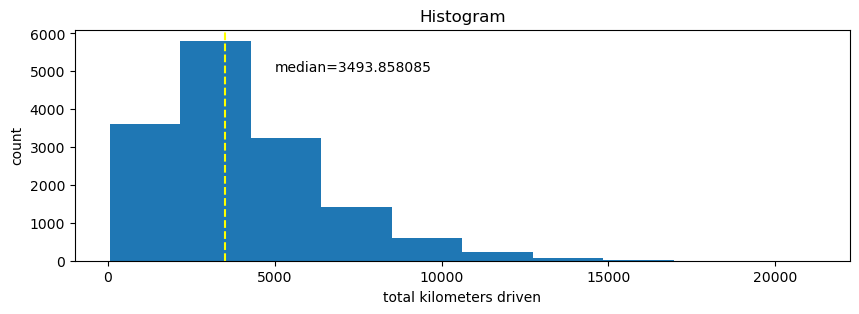

In [12]:
plt.figure(figsize=(10,1))
km = sns.boxplot(data=df, x='driven_km_drives')
plt.title('Total kilometers driven')
plt.show()

plt.figure(figsize=(10, 3))
plt.hist(df['driven_km_drives'])
plt.xlabel('total kilometers driven')
plt.ylabel('count')
plt.title('Histogram')
median=df['driven_km_drives'].median()
plt.axvline(median, color='yellow', linestyle='--')
plt.text(5000, 5000, 'median='+str(median), color='black')
plt.show()

In [13]:
# Drop missing data points
df.dropna(inplace=True)

In [14]:
df.isnull().sum()

ID                         0
label                      0
sessions                   0
drives                     0
total_sessions             0
n_days_after_onboarding    0
total_navigations_fav1     0
total_navigations_fav2     0
driven_km_drives           0
duration_minutes_drives    0
activity_days              0
driving_days               0
device                     0
dtype: int64

In [18]:
# Data Segmentation
y = df.pop('label_retained')

In [17]:
# Encoding categorical data
df = pd.get_dummies(df, drop_first=True)
df.head(3)

,ID,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,label_retained,device_iPhone
0,0,283,226,296.748273,2276,208,0,2628.845068,1985.775061,28,19,True,False
1,1,133,107,326.896596,1225,19,64,13715.920550,3160.472914,13,11,True,True
2,2,114,95,135.522926,2651,0,0,3059.148818,1610.735904,14,8,True,False


In [19]:
# Drop redundant features
df.drop('ID', axis=1, inplace=True)

### Data Normalization

In [20]:
# Instantiate scaler - having our values in 0s and 1s
scaler = MinMaxScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
df_scaled.head(3)

,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,device_iPhone
0,0.380888,0.379195,0.243868,0.649886,0.168285,0.000000,0.121593,0.124262,0.903226,0.633333,0.0
1,0.179004,0.179530,0.268663,0.349256,0.015372,0.154217,0.646476,0.198453,0.419355,0.366667,1.0
2,0.153432,0.159396,0.111275,0.757151,0.000000,0.000000,0.141964,0.100575,0.451613,0.266667,0.0


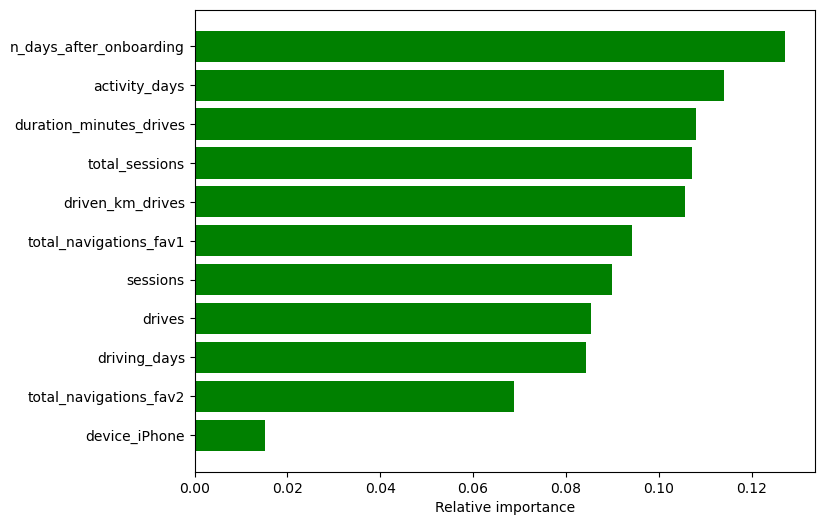

In [ ]:
# Identify key predictor features in the dataset
from sklearn.ensemble import RandomForestClassifier

# Instantiate 
feat_model = RandomForestClassifier()

# Fit the model
feat_model.fit(df_scaled, y)
feature_names = list(df_scaled.columns)
importance = feat_model.feature_importances_
indices = np.argsort(importance)

plt.figure(figsize=(8,6))
plt.barh(range(len(indices)), importance[indices], color='green', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative importance')
plt.show()

### Phase 2:
- Splitting data into training and evaluation datasets.
- Implementing Machine Learning Building and Training.
- Creatig a prediction file.

In [24]:
# Split dataset into train and test model using cross validation
from sklearn.model_selection import train_test_split

X_train, x_test, Y_train, y_test = train_test_split(df_scaled, y, test_size = 0.3, random_state=1)

In [25]:
X_train.shape, x_test.shape

((10009, 11), (4290, 11))

In [26]:
# Import predictive models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [27]:
# Instantiate models
log_reg = LogisticRegression()
dec_tree = DecisionTreeClassifier()
gb_clf = GradientBoostingClassifier()

In [28]:
# Fit the model on training data
log_reg.fit(X_train, Y_train)
dec_tree.fit(X_train, Y_train)
gb_clf.fit(X_train, Y_train)

GradientBoostingClassifier()

In [29]:
# Predictions
log_pred = log_reg.predict(x_test)
dec_pred = dec_tree.predict(x_test)
gb_pred = gb_clf.predict(x_test)

In [30]:
gb_pred

array([ True,  True,  True, ...,  True,  True,  True])

### Phase 3:
- Model evaluation and interpretation phase.
- Metrics to use for classification problem.
    - Confusion matrix.
    - Classification report.

In [57]:
# Importing evaluation matrix
from sklearn.metrics import classification_report, confusion_matrix 

# Classification_report;x-test used for testing while y-test for evaluation
print('Classification report for the Logistic Regression model \n', classification_report(y_test, log_pred))
print('Classification report for the Decision Tree Classifier model \n', classification_report(y_test, dec_pred))
print('Classification report for the Gradient Boosting classifier model \n', classification_report(y_test, gb_pred))

Classification report for the Logistic Regression model 
               precision    recall  f1-score   support

       False       0.52      0.07      0.12       778
        True       0.83      0.99      0.90      3512

    accuracy                           0.82      4290
   macro avg       0.68      0.53      0.51      4290
weighted avg       0.77      0.82      0.76      4290

Classification report for the Decision Tree Classifier model 
               precision    recall  f1-score   support

       False       0.26      0.27      0.26       778
        True       0.84      0.83      0.83      3512

    accuracy                           0.73      4290
   macro avg       0.55      0.55      0.55      4290
weighted avg       0.73      0.73      0.73      4290

Classification report for the Gradient Boosting classifier model 
               precision    recall  f1-score   support

       False       0.52      0.08      0.13       778
        True       0.83      0.98      0.90      

In [64]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    Plot confusion matrix with percentages
    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ['{0:0.0f}'.format(item) + '\n{0:.2%}'.format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)
    
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt='')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')

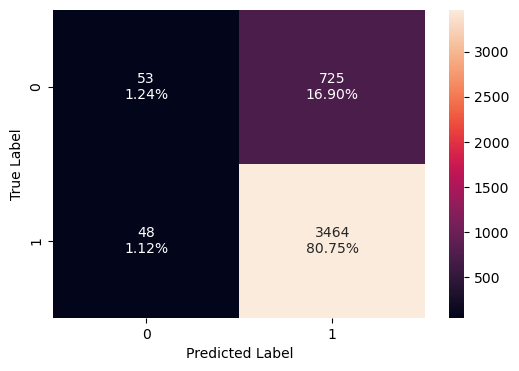

In [61]:
confusion_matrix_sklearn(log_reg, x_test, y_test)

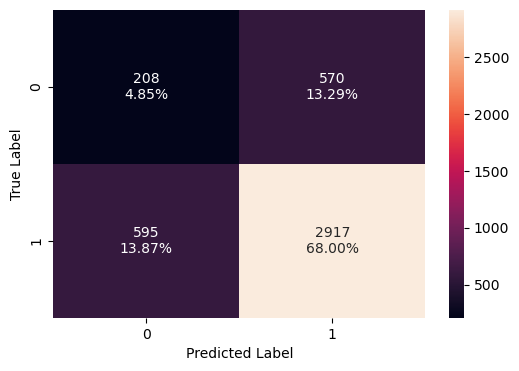

In [68]:
confusion_matrix_sklearn(dec_tree, x_test, y_test)

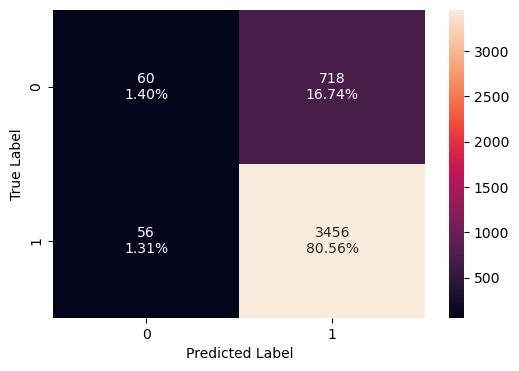

In [67]:
confusion_matrix_sklearn(gb_clf, x_test, y_test)

In [41]:
# Class imbalance in ML

### Phase 4: Hyperparameter Optimization and Productionizing the Model
- Hyperparameter optimization is the art and science of improving the model's performance i.e. this of hyperparameter as some configurations, or settings you can implement or tweak that can improve your model's performance.
- This is the last stage of ML pipelinine, and the main aim here points to how the users use/consume the model. There are alot of ways an ML Model can be used:
    - It can be embedded into an application to be used by users online via an API on web interfaces or on mobile devices. It can be used to create reports or dashboards that will be used by the organization in making hkey business decisions. It can be consumed via streaming or batch methods.

<b>In this case scenario, I will simulate the use of the model on a new datset and use it to make relevant predicitions.</b>

### Business Recommendation and Conclusions